# 1. seaborn 활용 시각화

### 1 - 1. 전처리 데이터 불러오기

In [161]:
import pandas as pd
import numpy as np

In [162]:
crime_anal_norm = pd.read_csv("../data/02. crime_in_Seoul_self_summary.csv", index_col=0,encoding="euc-kr")
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.357143,0.977118,0.733773,80.038760,100.000000,100.000000,53.470867,88.130935,561052,3238,0.813607,84.328112
강동구,0.310078,0.358974,0.285714,0.477799,0.463880,95.000000,92.857143,100.000000,51.425314,86.996047,440359,1010,0.379289,85.255701
강북구,0.420543,0.128205,0.500000,0.332879,0.509351,73.271889,80.000000,85.714286,54.991817,89.344852,328002,831,0.378196,76.664569
관악구,0.624031,0.307692,0.428571,0.572868,0.593143,81.987578,83.333333,100.000000,44.555397,83.678516,520929,2109,0.505261,78.710965
광진구,0.540698,0.282051,0.285714,0.718060,0.438577,83.870968,54.545455,100.000000,40.098634,84.071906,372298,878,0.453020,72.517393


In [163]:
crime_anal_norm.sort_index(ascending=False, inplace=True)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
중랑구,0.317829,0.358974,0.571429,0.460637,0.580125,91.463415,100.000000,87.500000,62.211709,85.714286,412780,916,0.457799,85.377882
중구,0.383721,0.205128,0.214286,0.585671,0.407957,74.747475,87.500000,100.000000,42.511628,89.707865,134593,1023,0.359353,78.893394
종로구,0.461240,0.307692,0.428571,0.528466,0.414925,74.369748,75.000000,33.333333,39.587629,87.361909,164257,1619,0.428179,61.930524
은평구,0.302326,0.230769,0.428571,0.453827,0.488449,91.025641,77.777778,100.000000,53.421369,86.636637,491202,2108,0.380788,81.772285
용산구,0.486434,0.230769,0.285714,0.405612,0.437110,85.258964,100.000000,100.000000,40.228341,84.228188,244444,2096,0.369128,81.943099


In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

plt.rcParams["axes.unicode_minus"] = False
rc("font", family = "Malgun Gothic")
%matplotlib inline

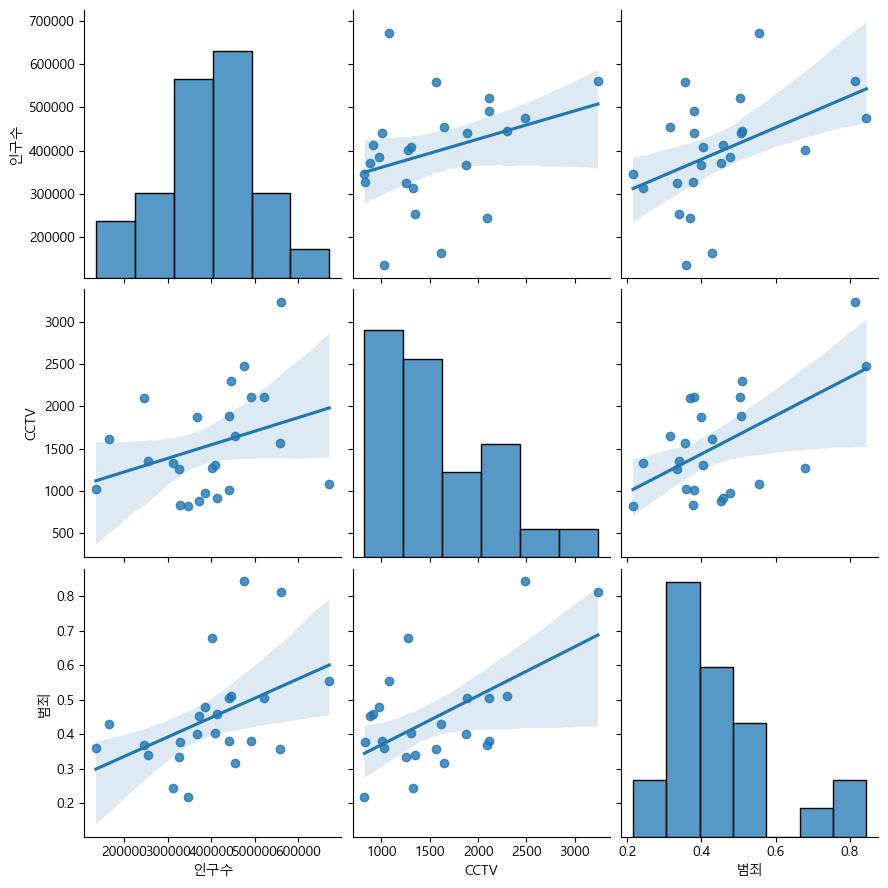

In [4]:
sns.pairplot(
    data = crime_anal_norm,
    vars = ["인구수", "CCTV", "범죄"],
    kind = "reg", # regression, 종류는 4개다
    height = 3
)
plt.show()

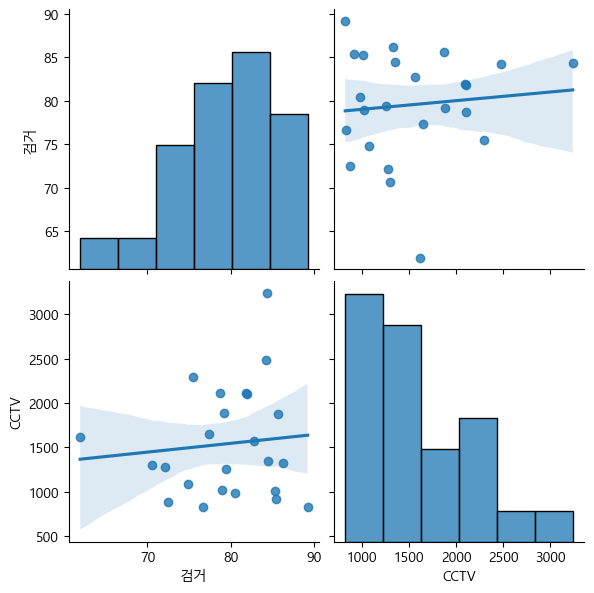

In [5]:
sns.pairplot(
    data = crime_anal_norm,
    vars = ["검거", "CCTV"],
    kind = "reg", # regression, 종류는 4개다
    height = 3
)
plt.show()

# 검거율 heatmap 해보자


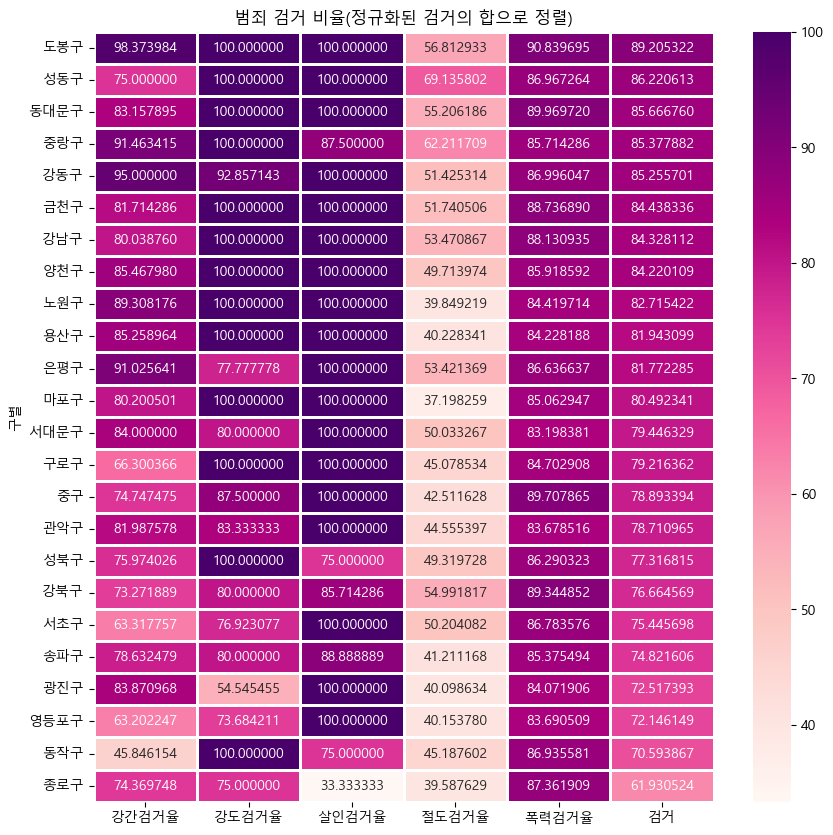

In [6]:
# 검거율 heatmap 해보자
# 검거컬럼을 기준으로 정렬

def drawGraph():
    
    # 데이터 프레임 생성
    target_col = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율", "검거"]
    crime_anal_norm_sort = crime_anal_norm.sort_values(by = "검거", ascending = False)
    
    # 그래프 설정
    plt.figure(figsize = (10,10))
    sns.heatmap(
        data = crime_anal_norm_sort[target_col],
        annot = True, # 데이터값 표시하자
        fmt = "f", # 실수형
        linewidths = 1, # 각 맵간의 간격설정
        cmap = "RdPu"
    )
    plt.title("범죄 검거 비율(정규화된 검거의 합으로 정렬)")
    plt.show()

drawGraph()

# 5대 범죄 heatmap

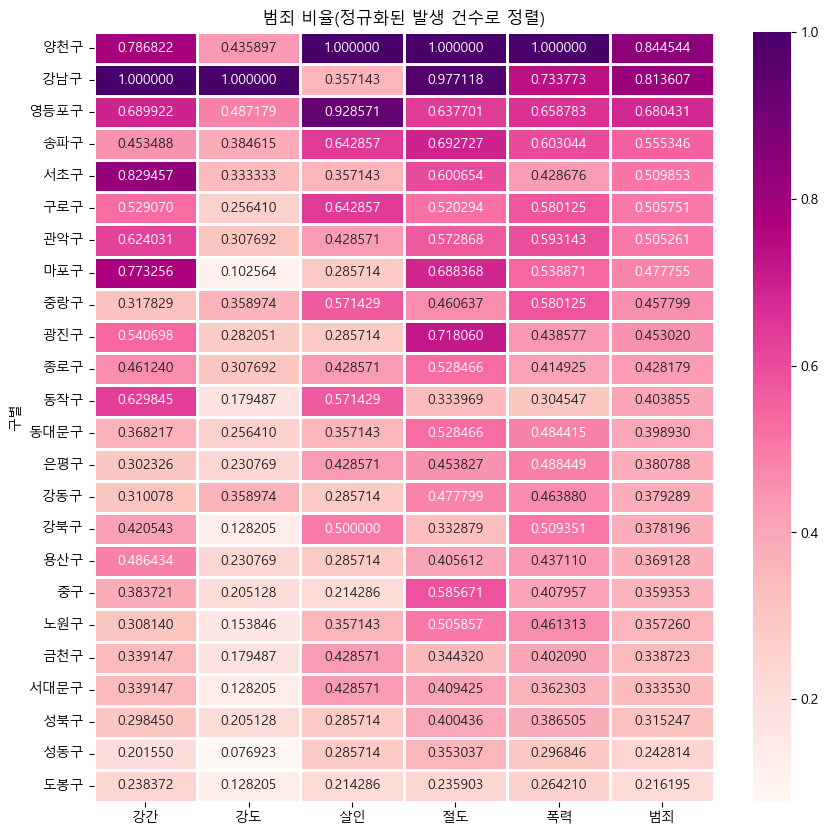

In [7]:
# 범죄발생 건수로 heatmap 해보자
# 범죄 컬럼을 기준으로 정렬

def drawGraph():
    
    # 데이터 프레임 생성
    target_col = ["강간", "강도", "살인", "절도", "폭력", "범죄"]
    crime_anal_norm_sort = crime_anal_norm.sort_values(by = "범죄", ascending = False)
    
    # 그래프 설정
    plt.figure(figsize = (10,10))
    sns.heatmap(
        data = crime_anal_norm_sort[target_col],
        annot = True, # 데이터값 표시하자
        fmt = "f", # 실수형
        linewidths = 1, # 각 맵간의 간격설정
        cmap = "RdPu"
    )
    plt.title("범죄 비율(정규화된 발생 건수로 정렬)")
    plt.show()

drawGraph()

# 10. 서울시 범죄현황에 대한 지도 시각화

In [8]:
import json
import folium
import pandas as pd

In [9]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding = "utf-8"))

In [10]:
# 5대 범죄 발생 건수 지도 시각화

my_map = folium.Map(
    location = [37.5502, 126.982],
    zoom_start = 10.5,
    tiles = "Stamen Toner"
)

# 경계선 삽입
folium.Choropleth(
    geo_data = geo_str, # 우리나라 경계선좌표값이 담긴 데이터
    data = crime_anal_norm["범죄"],
    columns = [crime_anal_norm.index, crime_anal_norm["범죄"]],
    
    key_on = "feature.id",
    fill_color = "PuRd",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "정규화된 5대 범죄 발생 건수"
).add_to(my_map)

my_map

In [11]:
# 인구대비 범죄 발생 건수 지도 시각화

tmp_criminal = crime_anal_norm["범죄"] / crime_anal_norm["인구수"]


my_map = folium.Map(
    location = [37.5502, 126.982],
    zoom_start = 10.5,
    tiles = "Stamen Toner"
)

# 경계선 삽입
folium.Choropleth(
    geo_data = geo_str, # 우리나라 경계선좌표값이 담긴 데이터
    data = tmp_criminal,
    columns = [crime_anal_norm.index, tmp_criminal],
    
    key_on = "feature.id",
    fill_color = "PuRd",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "인구대비 범죄 살인 발생 건수"
).add_to(my_map)

my_map

# 경찰서의 검거능력

In [165]:
# 경찰서 위치를 표시하기 위해 중간에 저장해두었던 위도경도 파일을 다시 불러온다.

crime_station = pd.read_csv("../data/02. crime_station_raw_self_summary.csv", index_col=0, encoding="euc-kr")
crime_station

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,lat,lng,구별
구분,,,,,,,,,,,,,
강남,269,339,26,24,3,3,1129,2438,2096,2336,37.509435,127.066958,강남구
강동,152,160,13,14,5,4,902,1754,2201,2530,37.528511,127.126822,강동구
강북,159,217,4,5,6,7,672,1222,2482,2778,37.637197,127.027305,강북구
강서,239,275,10,10,10,9,1070,1952,2768,3204,37.539783,126.829997,양천구
관악,264,322,10,12,7,6,937,2103,2707,3235,37.474395,126.951349,관악구
광진,234,279,6,11,4,4,1057,2636,2011,2392,37.542823,127.083839,광진구
구로,181,273,13,10,9,9,861,1910,2680,3164,37.507442,126.890224,구로구
금천,143,175,7,7,6,6,654,1264,1946,2193,37.456813,126.896806,금천구
남대문,52,57,4,5,1,1,429,946,832,890,37.554758,126.973498,중구


In [166]:
# 구별로 인덱스 치환, 정렬
crime_station = pd.pivot_table(crime_station, index = ["구별"], aggfunc = np.sum)
crime_station.sort_values(by="구별",ascending=False ,inplace=True)

crime_station.head()

,lat,lng,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,,,
중랑구,37.605643,127.076487,150,164,14,14,7,8,1052,1691,2712,3164
중구,75.118375,253.963150,148,198,7,8,3,3,914,2150,1996,2225
종로구,75.143792,253.983111,177,238,9,12,2,6,768,1940,1977,2263
은평구,75.230112,253.850143,142,156,7,9,6,6,890,1666,2308,2664
용산구,37.538710,126.965918,214,251,10,9,4,4,599,1489,2008,2384


In [167]:
crime_station["검거"] = crime_anal_norm["검거"]
crime_station

,lat,lng,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,검거
구별,,,,,,,,,,,,,
중랑구,37.605643,127.076487,150,164,14,14,7,8,1052,1691,2712,3164,85.377882
중구,75.118375,253.963150,148,198,7,8,3,3,914,2150,1996,2225,78.893394
종로구,75.143792,253.983111,177,238,9,12,2,6,768,1940,1977,2263,61.930524
은평구,75.230112,253.850143,142,156,7,9,6,6,890,1666,2308,2664,81.772285
용산구,37.538710,126.965918,214,251,10,9,4,4,599,1489,2008,2384,81.943099
영등포구,37.526044,126.900809,225,356,14,19,13,13,940,2341,3007,3593,72.146149
양천구,75.056554,253.695696,347,406,17,17,15,14,1825,3671,4686,5454,84.220109
송파구,37.501694,127.127248,184,234,12,15,8,9,1048,2543,2808,3289,74.821606
성북구,75.191045,254.049965,117,154,8,8,3,4,725,1470,1819,2108,77.316815


In [168]:
# 검거 정규화 하기
crime_station["검거"] = crime_station["검거"] / crime_station["검거"].max()
crime_station

,lat,lng,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,검거
구별,,,,,,,,,,,,,
중랑구,37.605643,127.076487,150,164,14,14,7,8,1052,1691,2712,3164,0.957094
중구,75.118375,253.963150,148,198,7,8,3,3,914,2150,1996,2225,0.884402
종로구,75.143792,253.983111,177,238,9,12,2,6,768,1940,1977,2263,0.694247
은평구,75.230112,253.850143,142,156,7,9,6,6,890,1666,2308,2664,0.916675
용산구,37.538710,126.965918,214,251,10,9,4,4,599,1489,2008,2384,0.918590
영등포구,37.526044,126.900809,225,356,14,19,13,13,940,2341,3007,3593,0.808765
양천구,75.056554,253.695696,347,406,17,17,15,14,1825,3671,4686,5454,0.944115
송파구,37.501694,127.127248,184,234,12,15,8,9,1048,2543,2808,3289,0.838757
성북구,75.191045,254.049965,117,154,8,8,3,4,725,1470,1819,2108,0.866729


In [169]:
# 경찰서의 검거율을 원형 시각화. 경찰의 검거 능력을 나타낸다고 볼 수 있다...? 

my_map = folium.Map(
    location = [37.5502, 126.982],
    zoom_start = 11
)

# 경계선 추가하기
folium.Choropleth(
    geo_data = geo_str,
    data = crime_anal_norm["범죄"],
    columns = [crime_anal_norm.index, crime_anal_norm["범죄"]],
    
    key_on = "feature.id",
    fill_color = "PuRd",
    fill_opacity = 0.7,
    line_opacity = 0.2,
).add_to(my_map)


for idx,rows in crime_station.iterrows():
    
    # 경찰서의 위도 경도를 반복문으로 마커 표시
    folium.CircleMarker(
        location = [rows["lat"],rows["lng"]],
        radius=rows["검거"]*50,
        
        popup = rows["구분"] + " : " "%.2f"%rows["검거"], # 강남 : 0.75
        tooltip = rows["구분"] + "경찰서 검거율",
    
        color = "#3186cc",
        fill = True,
        fill_color = "#3186cc"
    ).add_to(my_map)
    
my_map

KeyError: '구분'